In [12]:
import pandas as pd
train_df = pd.read_csv('dataset/train.txt', sep=";", names=["text", "emotion"])
val_df = pd.read_csv('dataset/val.txt', sep=";", names=["text", "emotion"])
test_df = pd.read_csv('dataset/test.txt', sep=";", names=["text", "emotion"])

In [13]:
train_df = train_df.dropna()
val_df = val_df.dropna()
test_df = test_df.dropna()

In [14]:
train_df.emotion.unique().tolist(), val_df.emotion.unique().tolist(), test_df.emotion.unique().tolist()

(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
 ['sadness', 'love', 'anger', 'joy', 'fear', 'surprise'],
 ['sadness', 'joy', 'fear', 'anger', 'love', 'surprise'])

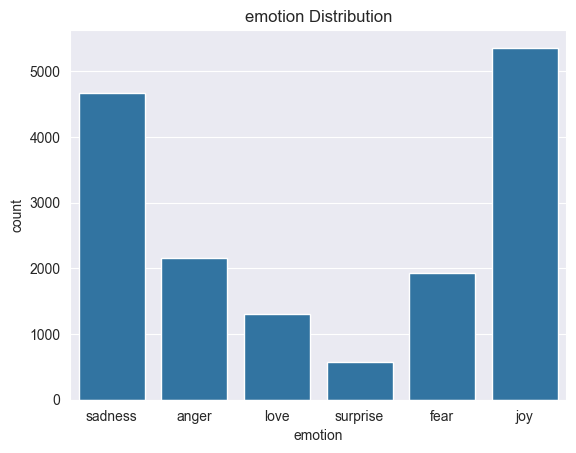

TypeError: can't multiply sequence by non-int of type 'float'

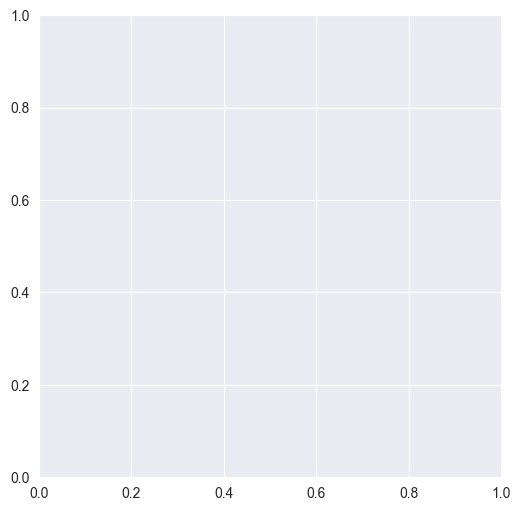

In [15]:
# 查看數據是否平衡。結論：不平衡資料集
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='emotion', data=train_df)
plt.title('emotion Distribution')
plt.show()

# 數據平衡（圓餅圖）
def balanced_plot(data):
    plt.figure(figsize=(6, 6))
    plt.pie(train_df.emotion.value_counts(),
            train_df.emotion.value_counts().index,
            autopct='%1.1f%%',
            startangle=30)
    plt.title('Diabetes', fontsize = 20)
    plt.legend(train_df.emotion.value_counts().index, loc='best')
    plt.axis('equal')  # 使圖形呈圓形
    plt.show()

balanced_plot(train_df)

In [16]:
import string
import nltk
from nltk.corpus import stopwords

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Update the cleaning function to remove stopwords
def clean_text_with_stopwords(text):
    # Convert to lower case and remove specific expressions
    text = text.lower().replace("i ", "").replace("im ", "").replace("i am ", "").replace("am ", "")
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply the updated cleaning function to the text data
train_df['text'] = train_df['text'].apply(clean_text_with_stopwords)
val_df['text'] = val_df['text'].apply(clean_text_with_stopwords)
test_df['text'] = test_df['text'].apply(clean_text_with_stopwords)

# Show the cleaned text from each dataset
train_df.head(), val_df.head(), test_df.head()

(                                                text  emotion
 0                              didnt feel humiliated  sadness
 1  go feeling hopeless damned hopeful around some...  sadness
 2             grabbing minute post feel greedy wrong    anger
 3  ever feeling nostalgic fireplace know still pr...     love
 4                                    feeling grouchy    anger,
                                                 text  emotion
 0              feeling quite sad sorry ill snap soon  sadness
 1  feel like still looking blank canvas blank pie...  sadness
 2                         feel like faithful servant     love
 3                                feeling cranky blue    anger
 4                              treat feeling festive      joy,
                                                 text  emotion
 0              feeling rather rotten ambitious right  sadness
 1                          updating blog feel shitty  sadness
 2    never make separate ever want feel like ashamed

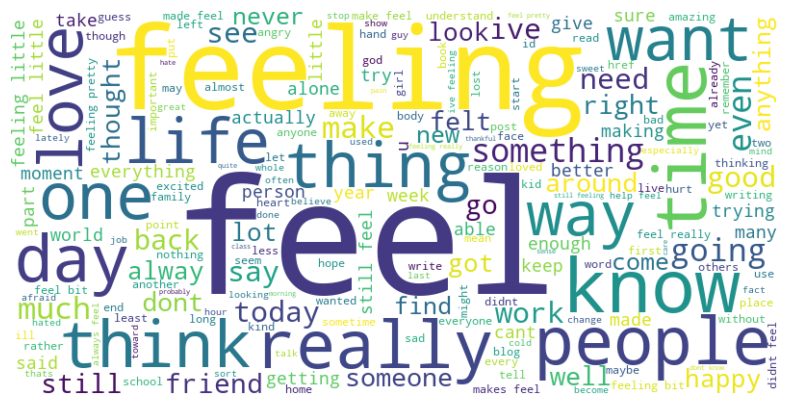

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 合併所有文本
text = ' '.join(train_df['text'])

# 創建WordCloud對象
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# 顯示生成的文字地圖
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
train_df.to_csv('dataset/train.csv', index=False)
val_df.to_csv('dataset/val.csv', index=False)
test_df.to_csv('dataset/test.csv', index=False)